<a href="https://colab.research.google.com/github/KennyOlat/kennyOlat/blob/main/Diabetic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WORK FLOW**

the flow of the projects includes:

Data Acquisition -> Data Preprocessing -> Model Building -> Prediction

In [10]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
# loading dataset into panda dataframe
dia = pd.read_csv("diabetes.csv")

In [3]:
#viewing the dataset
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#checking for the shape of the dataset
dia.shape

(768, 9)

In [5]:
#using describe to check for the dataset statistics
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#checking the data types of the dataset
dia.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#checking whether the dataset information
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


it can been seen above that the dataset has no null values

In [8]:
#checking the target values distribution
dia['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

outcome shows 500 people does not have diabetics while 268 have

In [9]:
#grouping the outcome by mean value
dia.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Data Visualization**

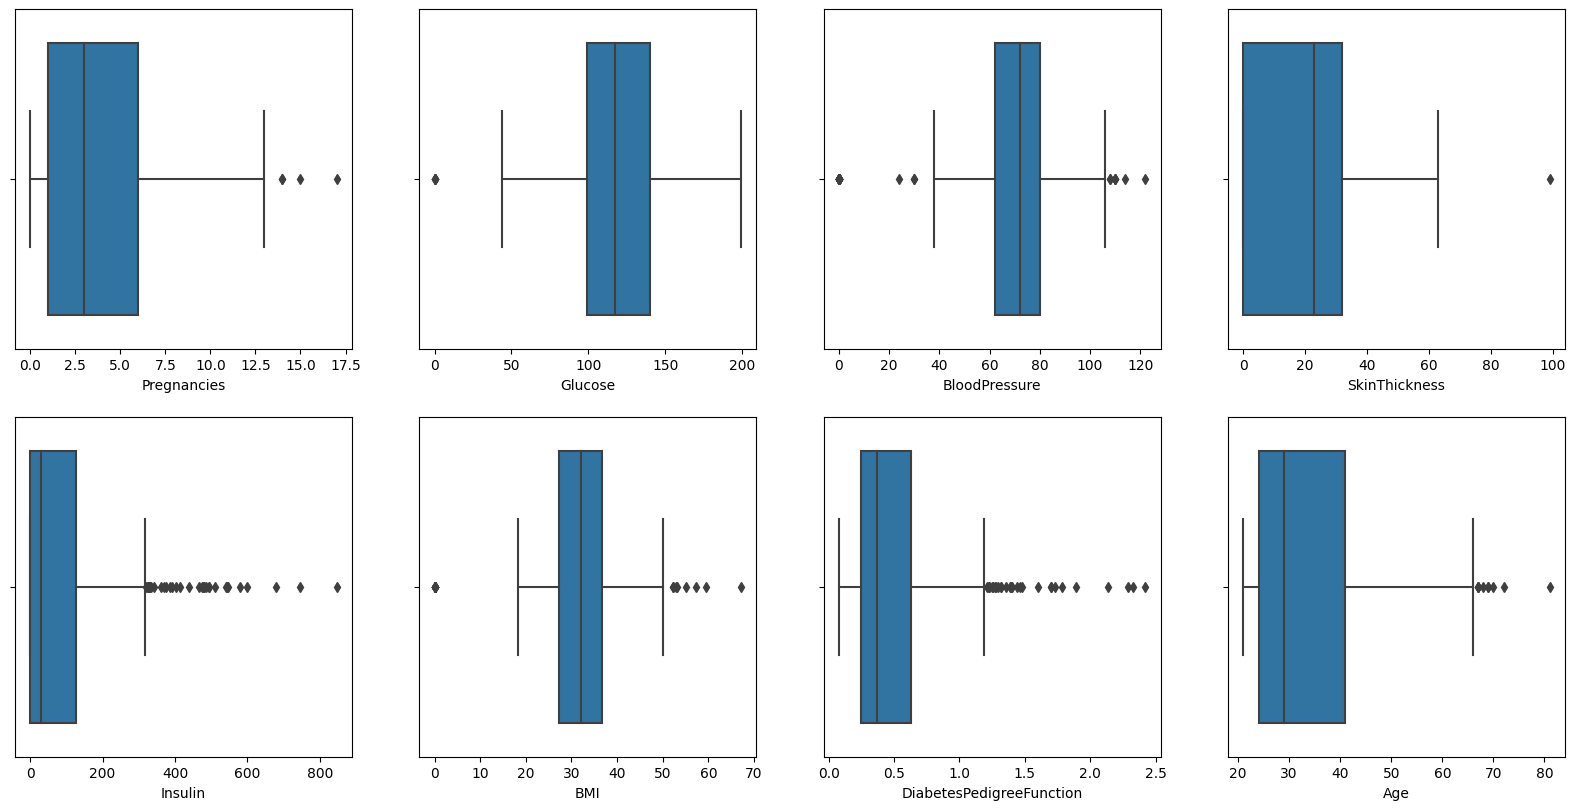

In [12]:
#using seaborn to visualize the dataset to explore whether their is outliers
plt.figure(figsize=(20,15))

plt.subplot(3,4,1)
ax = sns.boxplot(data = dia, x = 'Pregnancies')

plt.subplot(3,4,2)
ax = sns.boxplot(data = dia, x = 'Glucose')

plt.subplot(3,4,3)
ax = sns.boxplot(data = dia, x = 'BloodPressure')

plt.subplot(3,4,4)
ax = sns.boxplot(data = dia, x = 'SkinThickness')

plt.subplot(3,4,5)
ax = sns.boxplot(data = dia, x = 'Insulin')

plt.subplot(3,4,6)
ax = sns.boxplot(data = dia, x = 'BMI')

plt.subplot(3,4,7)
ax = sns.boxplot(data = dia, x = 'DiabetesPedigreeFunction')

plt.subplot(3,4,8)
ax = sns.boxplot(data = dia, x = 'Age')


*it can been seen that there are outliers, so there is need to remove the outliers using the clipping method*

In [13]:
# using the clipping method to deal with the ourliers
dia["Pregnancies"] = dia["Pregnancies"].clip(lower=dia["Pregnancies"].quantile(0.05), upper=dia["Pregnancies"].quantile(0.95))
dia["Glucose"] = dia["Glucose"].clip(lower=dia["Glucose"].quantile(0.05), upper=dia["Glucose"].quantile(0.95))
dia["BloodPressure"] = dia["BloodPressure"].clip(lower=dia["BloodPressure"].quantile(0.05), upper=dia["BloodPressure"].quantile(0.95))
dia["SkinThickness"] = dia["SkinThickness"].clip(lower=dia["SkinThickness"].quantile(0.05), upper=dia["SkinThickness"].quantile(0.95))
dia["Insulin"] = dia["Insulin"].clip(lower=dia["Insulin"].quantile(0.05), upper=dia["Insulin"].quantile(0.95))
dia["BMI"] = dia["BMI"].clip(lower=dia["BMI"].quantile(0.05), upper=dia["BMI"].quantile(0.95))
dia["DiabetesPedigreeFunction"] = dia["DiabetesPedigreeFunction"].clip(lower=dia["DiabetesPedigreeFunction"].quantile(0.05), upper=dia["DiabetesPedigreeFunction"].quantile(0.95))
dia["Age"] = dia["Age"].clip(lower=dia["Age"].quantile(0.05), upper=dia["Age"].quantile(0.95))


visualizing it again if the outliers have been removed

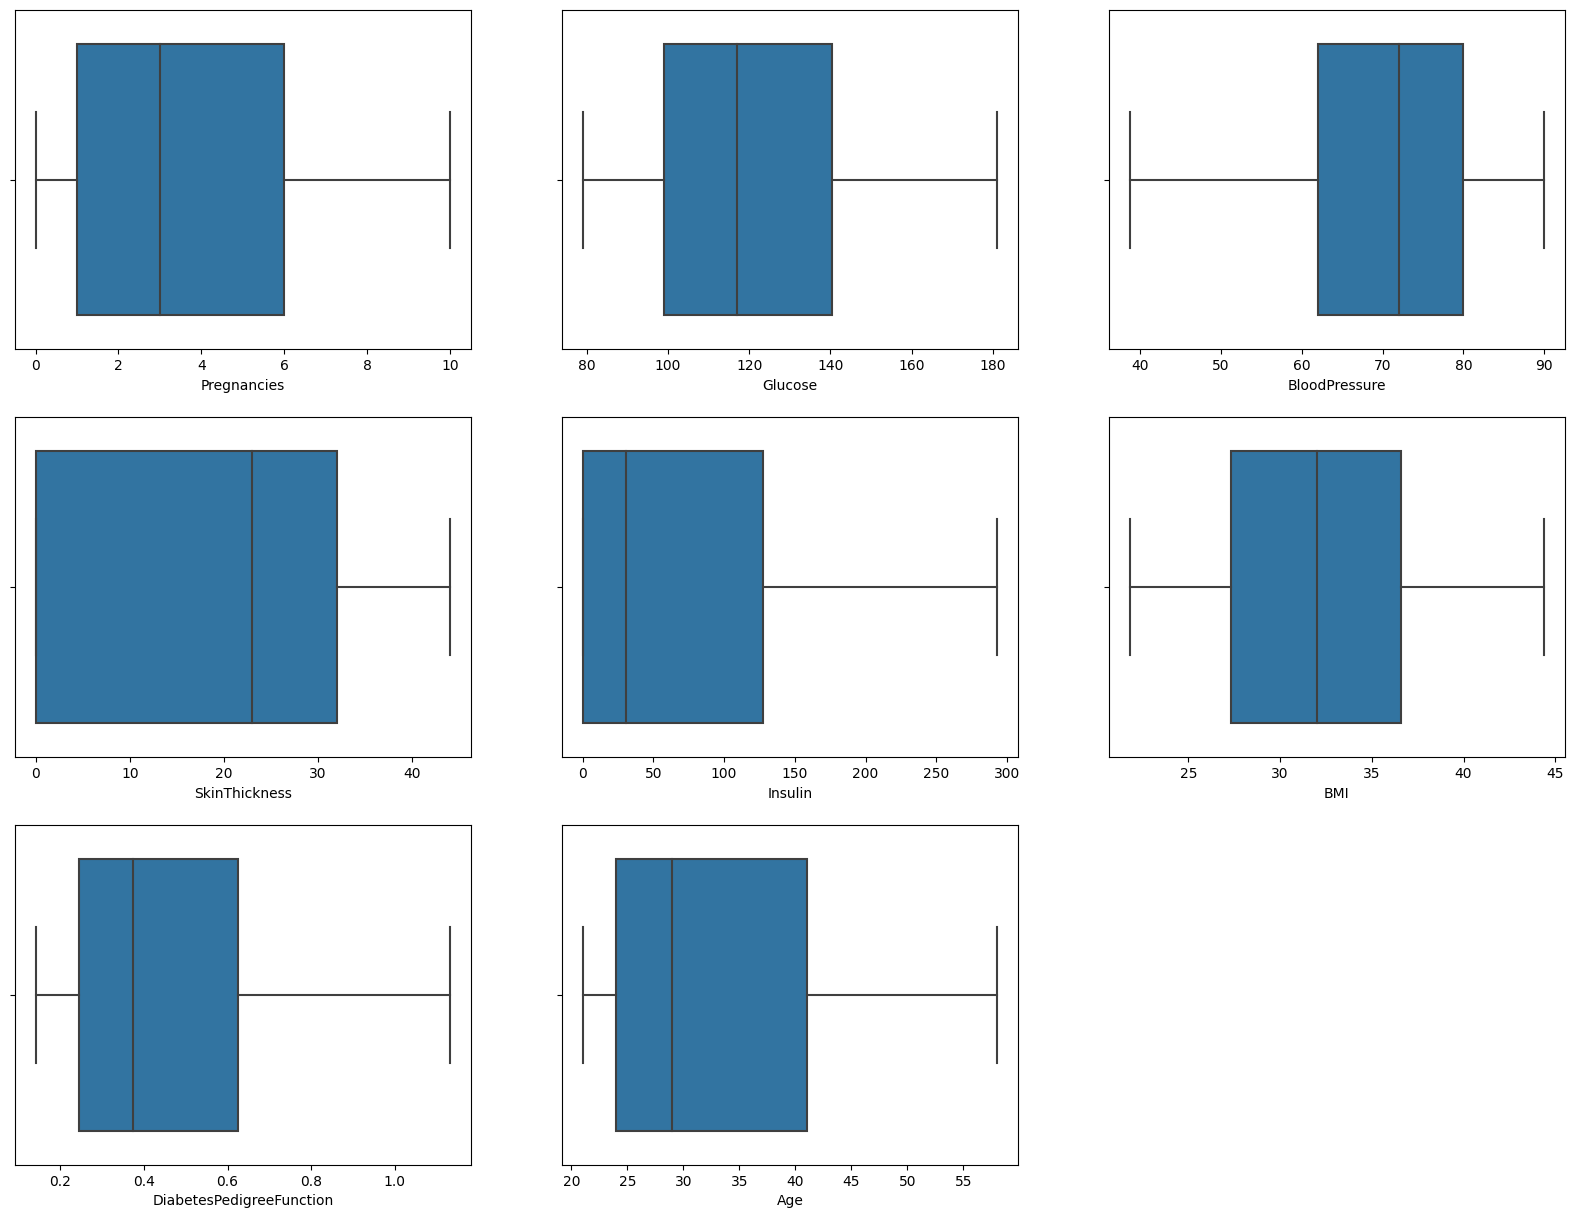

In [14]:
#using seaborn to visualize the dataset to explore whether outliers have been removed
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
ax = sns.boxplot(data = dia, x = 'Pregnancies')

plt.subplot(3,3,2)
ax = sns.boxplot(data = dia, x = 'Glucose')

plt.subplot(3,3,3)
ax = sns.boxplot(data = dia, x = 'BloodPressure')

plt.subplot(3,3,4)
ax = sns.boxplot(data = dia, x = 'SkinThickness')

plt.subplot(3,3,5)
ax = sns.boxplot(data = dia, x = 'Insulin')

plt.subplot(3,3,6)
ax = sns.boxplot(data = dia, x = 'BMI')

plt.subplot(3,3,7)
ax = sns.boxplot(data = dia, x = 'DiabetesPedigreeFunction')

plt.subplot(3,3,8)
ax = sns.boxplot(data = dia, x = 'Age')


the outliers have been removed.

In [15]:
# let's check for the correlation of the dataset
dia.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.138342,0.189732,-0.089856,-0.084848,0.014644,-0.018811,0.580956,0.219720
Glucose,0.138342,1.000000,0.207056,0.053465,0.310279,0.239247,0.113171,0.281431,0.491462
BloodPressure,0.189732,0.207056,1.000000,0.152647,0.052581,0.268748,0.044218,0.315844,0.114885
SkinThickness,-0.089856,0.053465,0.152647,1.000000,0.507545,0.394022,0.173183,-0.118945,0.067962
Insulin,-0.084848,0.310279,0.052581,0.507545,1.000000,0.212058,0.195651,-0.059339,0.122785
BMI,0.014644,0.239247,0.268748,0.394022,0.212058,1.000000,0.146112,0.056982,0.311453
DiabetesPedigreeFunction,-0.018811,0.113171,0.044218,0.173183,0.195651,0.146112,1.000000,0.050330,0.183554
Age,0.580956,0.281431,0.315844,-0.118945,-0.059339,0.056982,0.050330,1.000000,0.260498
Outcome,0.219720,0.491462,0.114885,0.067962,0.122785,0.311453,0.183554,0.260498,1.000000


Text(0.5, 1.0, 'Correlation')

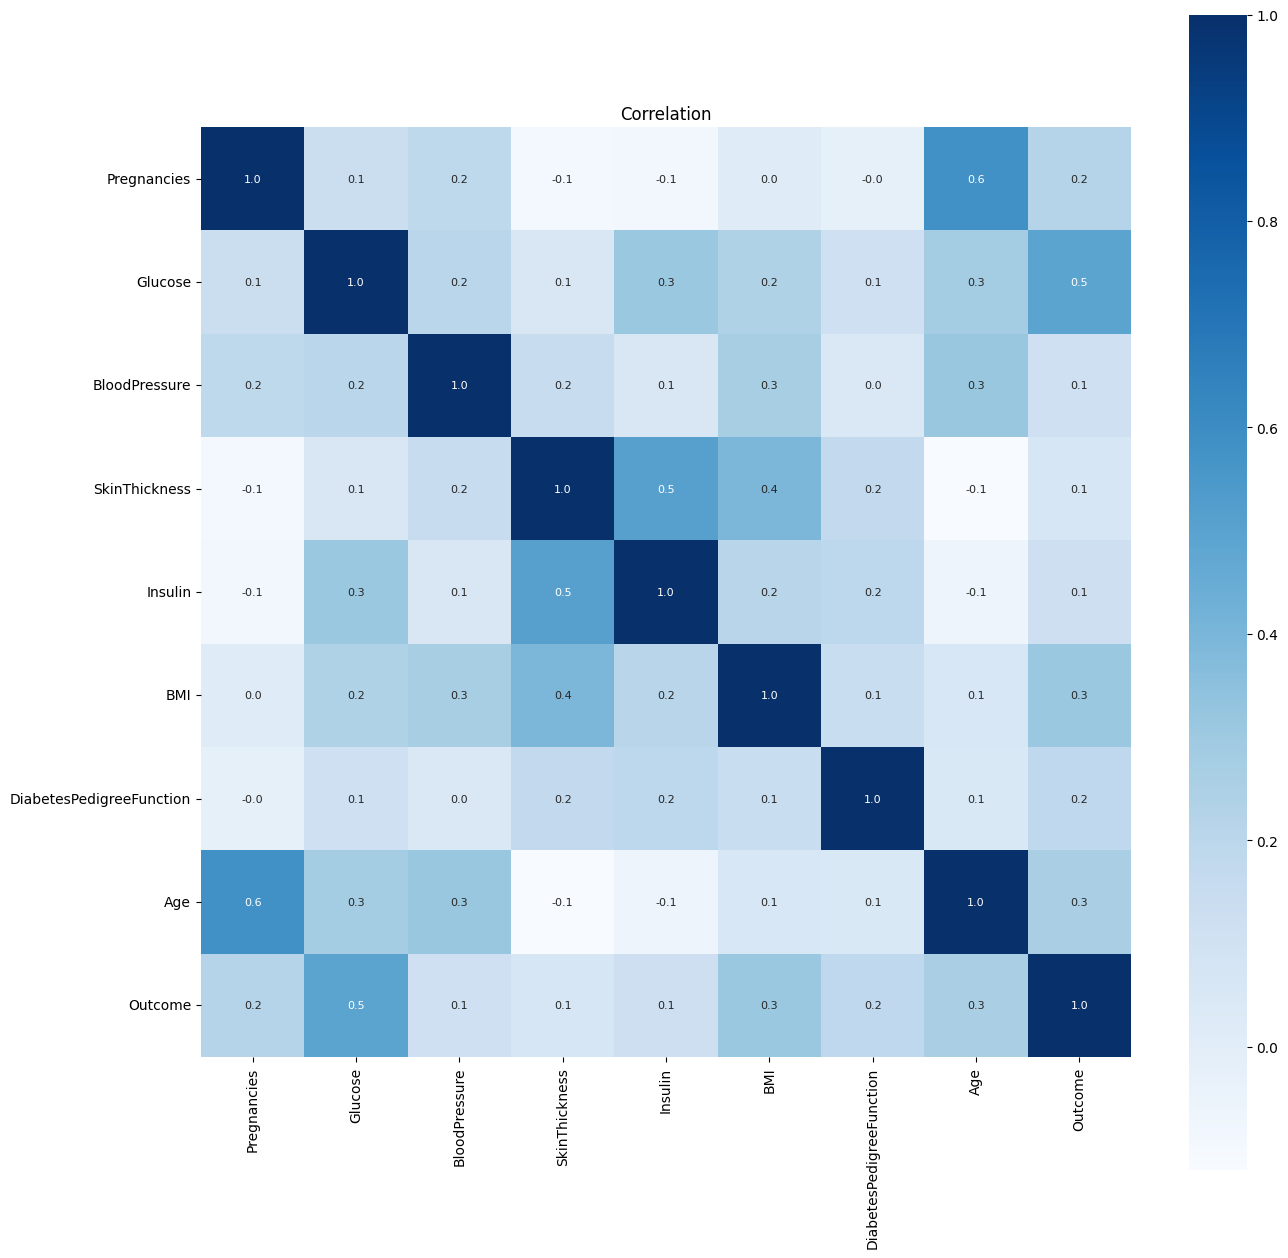

In [16]:
#using heatmap to visualize the correlation
ax =plt.figure(figsize=(15,15))
sns.heatmap(dia.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Correlation")

it is observed that glucose is the most correlated; age and BMI are fairly correlated with the outcome.

**MODEL BUILDING**

In [17]:
#Separate the Data and Label
X = dia.drop(columns = 'Outcome', axis=1)
Y = dia['Outcome']

In [18]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35        0  33.6   
1              1       85           66.0             29        0  26.6   
2              8      181           64.0              0        0  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             44      180  32.9   
764            2      122           70.0             27        0  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0              0        0  30.1   
767            1       93           70.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                     0.62700   50  
1                     0.35100   31  


In [19]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Standardizing the Data**


In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X)

StandardScaler()

In [22]:
sta_data = scaler.transform(X)

In [23]:
print(sta_data)

[[ 0.72322585  0.92012656  0.12083932 ...  0.22708176  0.61389087
   1.54987416]
 [-0.87838157 -1.25452191 -0.3436869  ... -0.87571594 -0.38399274
  -0.17744301]
 [ 1.36386882  2.05922814 -0.49852897 ... -1.39560628  0.77658928
  -0.08653158]
 ...
 [ 0.40290437 -0.01186564  0.12083932 ... -0.93873295 -0.76723789
  -0.26835444]
 [-0.87838157  0.16072551 -0.80821311 ... -0.32431709 -0.39122378
   1.27713987]
 [-0.87838157 -0.97837607 -0.03400275 ... -0.27705433 -0.51415147
  -0.90473446]]


In [24]:
X = sta_data
Y = dia['Outcome']

In [25]:
print(X)
print(Y)

[[ 0.72322585  0.92012656  0.12083932 ...  0.22708176  0.61389087
   1.54987416]
 [-0.87838157 -1.25452191 -0.3436869  ... -0.87571594 -0.38399274
  -0.17744301]
 [ 1.36386882  2.05922814 -0.49852897 ... -1.39560628  0.77658928
  -0.08653158]
 ...
 [ 0.40290437 -0.01186564  0.12083932 ... -0.93873295 -0.76723789
  -0.26835444]
 [-0.87838157  0.16072551 -0.80821311 ... -0.32431709 -0.39122378
   1.27713987]
 [-0.87838157 -0.97837607 -0.03400275 ... -0.27705433 -0.51415147
  -0.90473446]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [26]:
#splitting the dataset into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [27]:
#printing the shape of test and training set
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


**Model Training**

In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [30]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7817589576547231


In [32]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


**Prediction**

In [34]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.40290437  1.54145469  0.12083932 -0.08098501  1.13288868 -1.00174996
   0.46927005  1.64078559]]
[1]
The person is diabetic


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
